# Golf / Neural Network

In [64]:
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv("../data/golf.csv")
df

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


## One-Hot Encoder

In [43]:
columns_to_encode = ["Outlook", "Temp", "Humidity", "Windy"]

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded = encoder.fit_transform(df[columns_to_encode])
encoded_features = encoder.get_feature_names_out()
df_encoded = pd.DataFrame(data=encoded, columns=encoded_features)
df = pd.merge(df, df_encoded, left_index=True, right_index=True)
df = df.drop(columns=columns_to_encode)
df

,Play Golf,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temp_Cool,Temp_Hot,Temp_Mild,Humidity_High,Humidity_Normal,Windy_False,Windy_True
0,No,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,No,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,Yes,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,Yes,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,Yes,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
5,No,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
6,Yes,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
7,No,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
8,Yes,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
9,Yes,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


## Train/Test Split

In [44]:
X = df.drop(columns=["Play Golf"])
y = df["Play Golf"]

## Training

In [45]:
model = MLPClassifier(hidden_layer_sizes=(5, 5, ),
                     max_iter=1000,
                     verbose=False,
                     solver="adam",
                     # n_iter_no_change=10,
                     early_stopping=False)
model.fit(X, y)

C:\ProgramData\Miniconda3\envs\ai\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=1000)

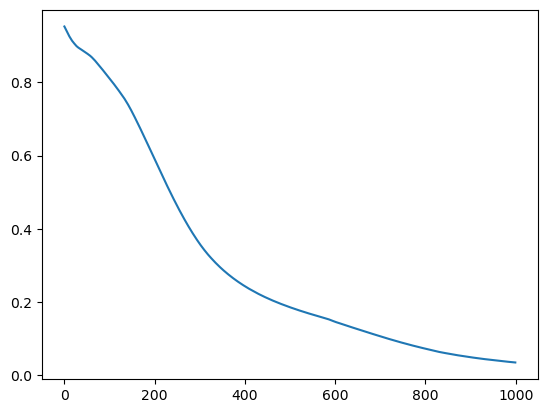

In [46]:
loss_curve = model.loss_curve_
plt.plot(loss_curve)
plt.show()

In [63]:
model.coefs_[0]

array([[-9.72663393e-01, -3.02647222e-02,  6.19896664e-01,
         9.21015470e-01, -7.96078752e-04],
       [ 3.55736006e-01, -7.50290029e-04, -6.69149703e-01,
        -5.25895564e-01,  2.14075802e-13],
       [ 6.95675622e-01, -1.98593561e-02, -3.62142440e-01,
         1.25191675e+00,  2.72623796e-22],
       [ 5.81471004e-01, -2.99638178e-06,  1.36597068e-01,
         7.55236799e-01, -8.59166512e-04],
       [ 4.65914910e-01, -6.43072966e-04, -1.73699505e-01,
         1.03887872e+00,  2.03187883e-05],
       [-8.84815628e-01, -3.23375734e-08,  5.29994429e-01,
         2.41155206e-01, -8.35225643e-04],
       [ 1.21528984e+00,  1.06126006e-17, -6.85414762e-01,
        -6.70280073e-01, -9.76023511e-03],
       [-5.47740782e-02, -3.54089359e-02,  4.63036743e-01,
         5.83396905e-01, -2.28458976e-23],
       [-8.33622073e-01,  3.16643063e-02,  9.53547640e-01,
         1.50762569e-01,  1.07460694e-16],
       [ 7.77170729e-01,  9.05793401e-17,  1.87477606e-01,
         8.71804867e-01

## Perceptron

In [66]:
model_p = Perceptron(max_iter=1000,
                     verbose=False,
                     # n_iter_no_change=10,
                     early_stopping=False)
model_p.fit(X, y)

Perceptron(verbose=False)

In [67]:
model_p.score(X, y)

0.7857142857142857

In [70]:
X.columns

Index(['Outlook_Overcast', 'Outlook_Rainy', 'Outlook_Sunny', 'Temp_Cool',
       'Temp_Hot', 'Temp_Mild', 'Humidity_High', 'Humidity_Normal',
       'Windy_False', 'Windy_True'],
      dtype='object')

In [69]:
model_p.coef_

array([[ 5., -3., -2., -2.,  0.,  2., -4.,  4.,  3., -3.]])

In [84]:
zipped = zip(X.columns.tolist(), model_p.coef_[0].tolist())
list(zipped)

[('Outlook_Overcast', 5.0),
 ('Outlook_Rainy', -3.0),
 ('Outlook_Sunny', -2.0),
 ('Temp_Cool', -2.0),
 ('Temp_Hot', 0.0),
 ('Temp_Mild', 2.0),
 ('Humidity_High', -4.0),
 ('Humidity_Normal', 4.0),
 ('Windy_False', 3.0),
 ('Windy_True', -3.0)]

## Decision Tree

In [47]:
model_dt = DecisionTreeClassifier(max_depth=None, criterion='entropy')
model_dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

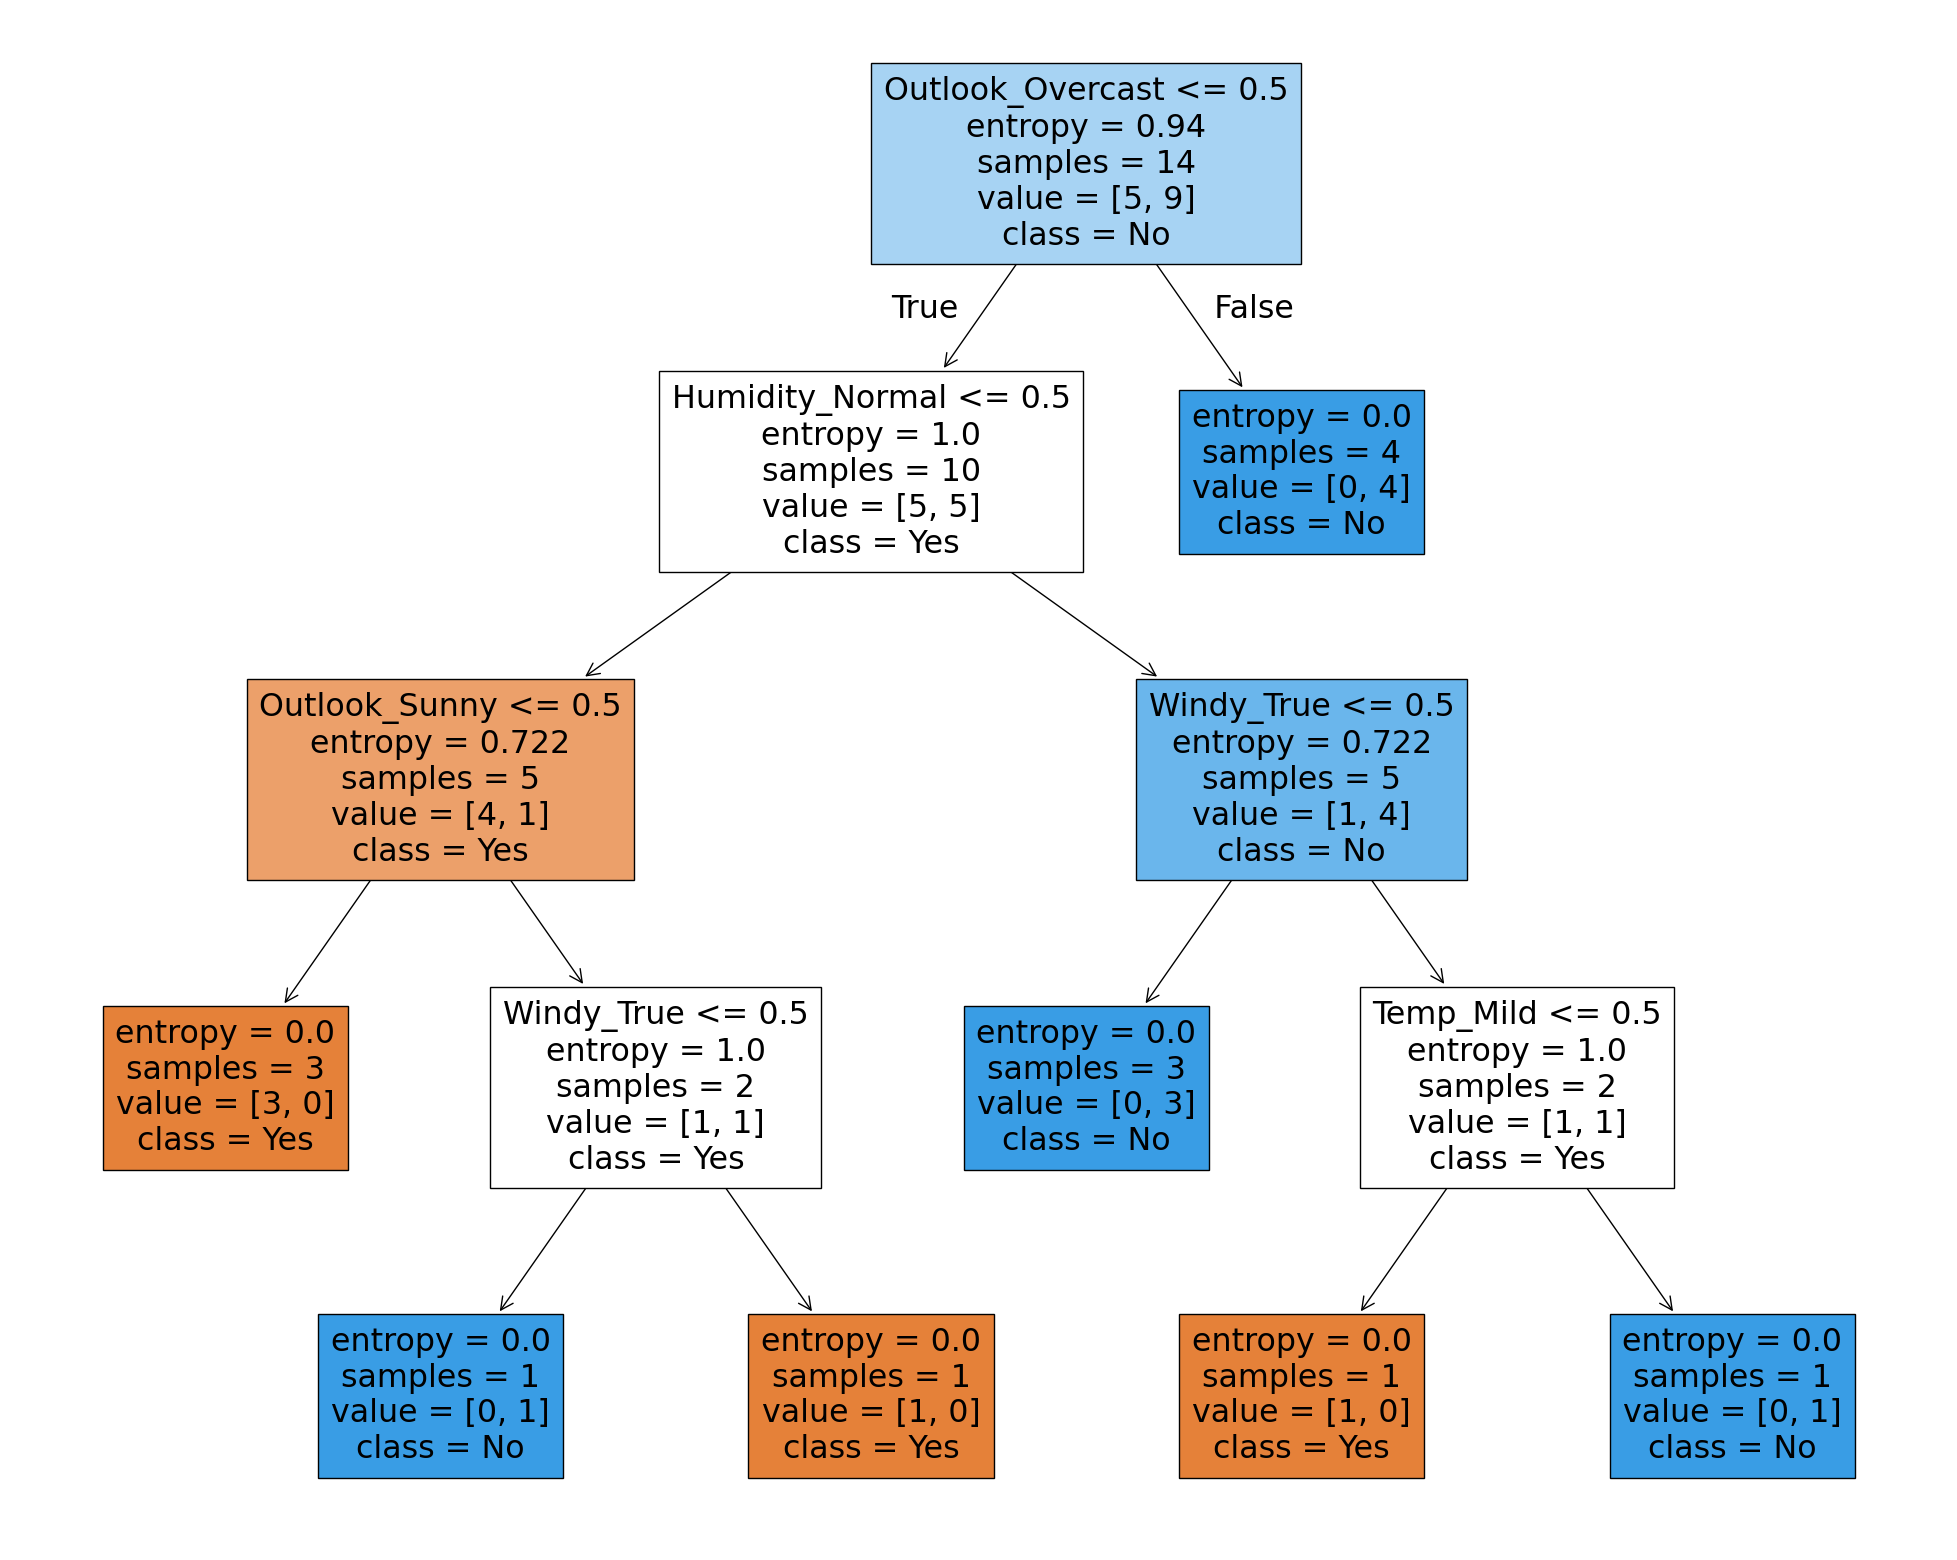

In [48]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model_dt, 
               feature_names=X.columns,  
               class_names=["Yes", "No"],
               filled=True)

### Important Features

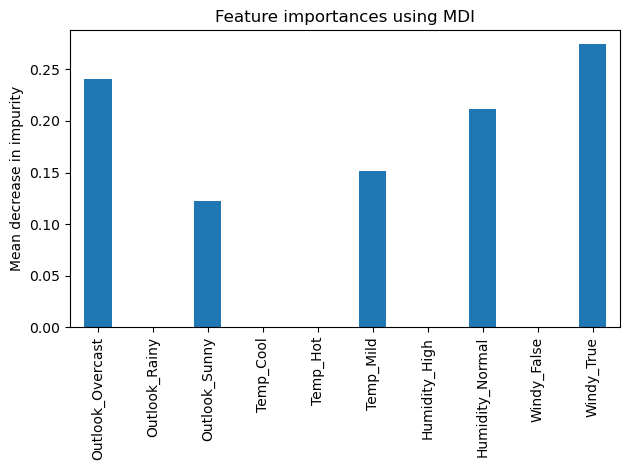

In [49]:
feature_importances = model_dt.feature_importances_
series = pd.Series(feature_importances, index=X.columns)

fig, ax = plt.subplots()
series.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Evaluation (DT)

In [50]:
model_dt.score(X, y)

1.0

## Evaluation (NN)

In [51]:
model.score(X, y)

1.0

In [52]:
predictions = model.predict(X)

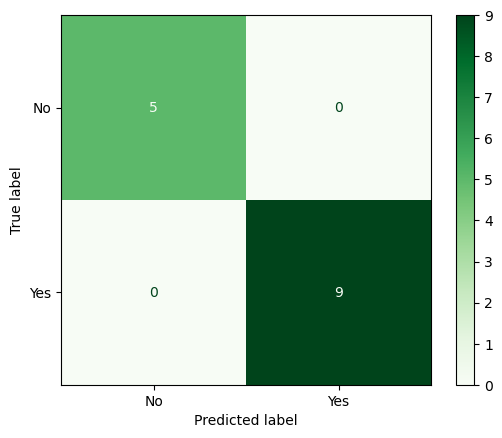

In [53]:
cm = confusion_matrix(y, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
disp.plot(cmap="Greens")
plt.show()

## Manual Testing

In [54]:
# outlook: Rainy / Temp: Hot / Humidity: Low / Windy: True
df_test = pd.DataFrame(data=[["Rainy", "Hot", "Normal", True]],
                       columns=columns_to_encode)
df_test

,Outlook,Temp,Humidity,Windy
0,Rainy,Hot,Normal,True


In [55]:
encoded = encoder.transform(df_test)

df_encoded = pd.DataFrame(data=encoded, columns=encoded_features)
df_test = pd.merge(df_test, df_encoded, left_index=True, right_index=True)
df_test = df_test.drop(columns=columns_to_encode)
df_test

,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temp_Cool,Temp_Hot,Temp_Mild,Humidity_High,Humidity_Normal,Windy_False,Windy_True
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [56]:
model.predict(df_test)

array(['No'], dtype='<U3')

In [57]:
model_dt.predict(df_test)

array(['No'], dtype=object)